## 5 模型验证

## 5.3.1 模型过拟合与欠拟合¶

In [97]:
# 导入工具
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.linear_model import SGDRegressor

In [98]:
# 读取数据
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [99]:
# 归一化
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

In [100]:
# PCA方法降维
from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

In [101]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

In [102]:
# 欠拟合

clf = SGDRegressor(max_iter=500, tol=1e-2) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.15113579394618035
SGDRegressor test MSE:    0.15551469547939334


In [103]:
# 过拟合

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13318261461718175
SGDRegressor test MSE:    0.14583466548495197


In [104]:
# 正常
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13433964082734126
SGDRegressor test MSE:    0.14293879483458063


## 5.3.2 模型正则化

In [106]:
## L2范数正则化

poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L2', alpha=0.0001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13415539999452453
SGDRegressor test MSE:    0.14282716844187407


In [107]:
## L1
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13415785107277609
SGDRegressor test MSE:    0.14251495860292732


In [ ]:
### ElasticNet L1和L2范数加权正则化

In [108]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'elasticnet', l1_ratio=0.9, alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13403948244151875
SGDRegressor test MSE:    0.14246079119930452


## 5.3.3 模型交叉验证¶

### 简单交叉验证

In [114]:

from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.14151381259083973
SGDRegressor test MSE:    0.14688591680983906


### 5折交叉验证

In [113]:

from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 折", "SGDRegressor train MSE:   ", score_train)
    print(k, " 折", "SGDRegressor test MSE:   ", score_test, '\n')  

0  折 SGDRegressor train MSE:    0.14987159165863323
0  折 SGDRegressor test MSE:    0.10619990768263739 

1  折 SGDRegressor train MSE:    0.1335366808947314
1  折 SGDRegressor test MSE:    0.18214740695960865 

2  折 SGDRegressor train MSE:    0.14644408683487287
2  折 SGDRegressor test MSE:    0.13271608580933406 

3  折 SGDRegressor train MSE:    0.14081179995443943
3  折 SGDRegressor test MSE:    0.16151086293160852 

4  折 SGDRegressor train MSE:    0.13810497674159009
4  折 SGDRegressor test MSE:    0.16523231934384092 



### 留一法 LOO CV

In [112]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  个 SGDRegressor train MSE:    0.1416084611445873
0  个 SGDRegressor test MSE:    0.011278434474878665 

1  个 SGDRegressor train MSE:    0.14158532057147394
1  个 SGDRegressor test MSE:    0.1262836575290399 

2  个 SGDRegressor train MSE:    0.14155542046744202
2  个 SGDRegressor test MSE:    0.03733514837940976 

3  个 SGDRegressor train MSE:    0.14151826224970793
3  个 SGDRegressor test MSE:    0.0038831600660882916 

4  个 SGDRegressor train MSE:    0.1417012204295255
4  个 SGDRegressor test MSE:    0.012242687031951227 

5  个 SGDRegressor train MSE:    0.14156005204276556
5  个 SGDRegressor test MSE:    0.13847869716922492 

6  个 SGDRegressor train MSE:    0.1416692859107634
6  个 SGDRegressor test MSE:    0.025333019061744958 

7  个 SGDRegressor train MSE:    0.141609986075828
7  个 SGDRegressor test MSE:    0.0005839560549211442 

8  个 SGDRegressor train MSE:    0.14154487237025198
8  个 SGDRegressor test MSE:    0.09115471746079101 

9  个 SGDRegressor train MSE:    0.14152043291448335
9 

### 留P法 LPO CV

In [115]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 10个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 10个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  10个 SGDRegressor train MSE:    0.1421078921116099
0  10个 SGDRegressor test MSE:    0.04938171997405652 

1  10个 SGDRegressor train MSE:    0.14189879728012997
1  10个 SGDRegressor test MSE:    0.04475262684954653 

2  10个 SGDRegressor train MSE:    0.1419300971852942
2  10个 SGDRegressor test MSE:    0.04599343580461141 

3  10个 SGDRegressor train MSE:    0.1419336103577765
3  10个 SGDRegressor test MSE:    0.05453930627413611 

4  10个 SGDRegressor train MSE:    0.1419211965029336
4  10个 SGDRegressor test MSE:    0.06927530140379037 

5  10个 SGDRegressor train MSE:    0.14130387925945612
5  10个 SGDRegressor test MSE:    0.04430442318638339 

6  10个 SGDRegressor train MSE:    0.14200827938760052
6  10个 SGDRegressor test MSE:    0.04950273382383804 

7  10个 SGDRegressor train MSE:    0.14195158338327024
7  10个 SGDRegressor test MSE:    0.05210569069916826 

8  10个 SGDRegressor train MSE:    0.14205758347080585
8  10个 SGDRegressor test MSE:    0.04719050426933339 

9  10个 SGDRegressor tra

## 5.3.4 模型超参空间及调参¶

### 穷举网格搜索

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200],
              'max_depth':[1, 2, 3]
        }


clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.25718756014176597


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

### 随机参数优化

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200, 300],
              'max_depth':[1, 2, 3, 4, 5]
        }


clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.19558153761415017


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

### Lgb 调参

In [120]:
clf = lgb.LGBMRegressor(num_leaves=31)

parameters = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)

print('Best parameters found by grid search are:', clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor RandomizedSearchCV test MSE:   ", score_test)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor RandomizedSearchCV test MSE:    0.15276694440817667


### Lgb 线下验证

In [123]:
train_data2 = pd.read_csv('./zhengqi_train.txt',sep='\t')
test_data2 = pd.read_csv('./zhengqi_test.txt',sep='\t')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

In [ ]:
# lgb 模型
from sklearn.model_selection  import KFold
import lightgbm as lgb
import numpy as np


# 5折交叉验证
Folds=5
kf = KFold(len(train_data2_f), n_splits=Folds, random_state=100, shuffle=True)
# 记录训练和预测MSE
MSE_DICT = {
    'train_mse':[],
    'test_mse':[]
}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    # lgb树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=100,
        boosting_type='gbdt',
        random_state=100,
        objective='regression',
    )
   
    # 切分训练集和预测集
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[test_index]
    y_train_KFold, y_test_KFold = train_data2_target[train_index], train_data2_target[test_index]
    
    # 训练模型
#     reg.fit(X_train_KFold, y_train_KFold)
    lgb_reg.fit(
            X=X_train_KFold,y=y_train_KFold,
            eval_set=[(X_train_KFold, y_train_KFold),(X_test_KFold, y_test_KFold)],
            eval_names=['Train','Test'],
            early_stopping_rounds=100,
            eval_metric='MSE',
            verbose=50
        )


    # 训练集预测 测试集预测
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_) 
    
#     print('第{}折 训练和预测 训练MSE 预测MSE'.format(i))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
#     print('------\n', '训练MSE\n', train_mse, '\n------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
#     print('------\n', '预测MSE\n', test_mse, '\n------\n')
    
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n', '训练MSE\n', MSE_DICT['train_mse'], '\n', np.mean(MSE_DICT['train_mse']), '\n------')
print('------\n', '预测MSE\n', MSE_DICT['test_mse'], '\n', np.mean(MSE_DICT['test_mse']), '\n------')

## 5.3.5 

### 1 学习曲线

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

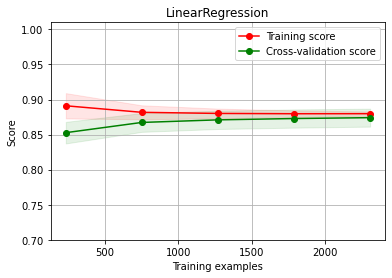

In [135]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = train_data2[test_data2.columns].values
y = train_data2['target'].values


title = "LinearRegression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = model_selection.ShuffleSplit(X.shape[0], n_splits=100,
                                   test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)


### 验证曲线

Automatically created module for IPython interactive environment


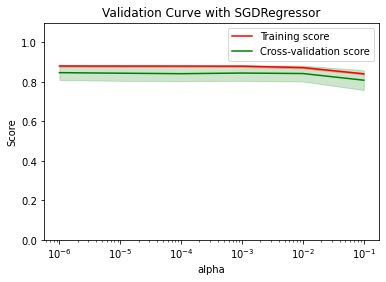

In [136]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

X = train_data2[test_data2.columns].values
y = train_data2['target'].values
# max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(
    SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1'), X, y, param_name="alpha", param_range=param_range,
    cv=10, scoring='r2', n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

# 6 特征优化

## 6.2.1 导入数据

In [137]:
import pandas as pd

train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

## 6.2.2 定义特征构造方法，构造特征

In [138]:
epsilon=1e-5

#组交叉特征，可以自行定义，如增加： x*x/y, log(x)/y 等等
func_dict = {
            'add': lambda x,y: x+y,
            'mins': lambda x,y: x-y,
            'div': lambda x,y: x/(y+epsilon),
            'multi': lambda x,y: x*y
            }

## 6.2.3 定义特征构造的函数

In [139]:
def auto_features_make(train_data,test_data,func_dict,col_list):
    train_data, test_data = train_data.copy(), test_data.copy()
    for col_i in col_list:
        for col_j in col_list:
            for func_name, func in func_dict.items():
                for data in [train_data,test_data]:
                    func_features = func(data[col_i],data[col_j])
                    col_func_features = '-'.join([col_i,func_name,col_j])
                    data[col_func_features] = func_features
    return train_data,test_data

## 6.2.4 特征降维处理

In [141]:
train_data2, test_data2 = auto_features_make(train_data,test_data,func_dict,col_list=test_data.columns)

from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
pca = PCA(n_components=500)
train_data2_pca = pca.fit_transform(train_data2.iloc[:,0:-1])
test_data2_pca = pca.transform(test_data2)
train_data2_pca = pd.DataFrame(train_data2_pca)
test_data2_pca = pd.DataFrame(test_data2_pca)
train_data2_pca['target'] = train_data2['target']

X_train2 = train_data2[test_data2.columns].values
y_train = train_data2['target']

## 6.2.5 使用lightgbm模型对新构造的特征进行模型训练和评估

In [ ]:
# ls_validation i
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import numpy as np

# 5折交叉验证
Folds=5
kf = KFold(len(X_train2), n_splits=Folds, random_state=2019, shuffle=True)
# 记录训练和预测MSE
MSE_DICT = {
    'train_mse':[],
    'test_mse':[]
}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(X_train2)):
    # lgb树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )
   
    # 切分训练集和预测集
    X_train_KFold, X_test_KFold = X_train2[train_index], X_train2[test_index]
    y_train_KFold, y_test_KFold = y_train[train_index], y_train[test_index]
    
    # 训练模型
    lgb_reg.fit(
            X=X_train_KFold,y=y_train_KFold,
            eval_set=[(X_train_KFold, y_train_KFold),(X_test_KFold, y_test_KFold)],
            eval_names=['Train','Test'],
            early_stopping_rounds=100,
            eval_metric='MSE',
            verbose=50
        )


    # 训练集预测 测试集预测
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_) 
    
    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n', '训练MSE\n', train_mse, '\n------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n', '预测MSE\n', test_mse, '\n------\n')
    
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n', '训练MSE\n', MSE_DICT['train_mse'], '\n', np.mean(MSE_DICT['train_mse']), '\n------')
print('------\n', '预测MSE\n', MSE_DICT['test_mse'], '\n', np.mean(MSE_DICT['test_mse']), '\n------')

# 7 模型融合

## 7.2.1 导入工具包

In [145]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

# modelling
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,cross_val_predict,KFold
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler

In [146]:
#load_dataset
with open("./zhengqi_train.txt")  as fr:
    data_train=pd.read_table(fr,sep="\t")
with open("./zhengqi_test.txt") as fr_test:
    data_test=pd.read_table(fr_test,sep="\t")

In [147]:
#merge train_set and test_set
data_train["oringin"]="train"
data_test["oringin"]="test"
data_all=pd.concat([data_train,data_test],axis=0,ignore_index=True)


In [148]:
data_all.drop(["V5","V9","V11","V17","V22","V28"],axis=1,inplace=True)

In [149]:
# normalise numeric columns
cols_numeric=list(data_all.columns)
cols_numeric.remove("oringin")
def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())
scale_cols = [col for col in cols_numeric if col!='target']
data_all[scale_cols] = data_all[scale_cols].apply(scale_minmax,axis=0)

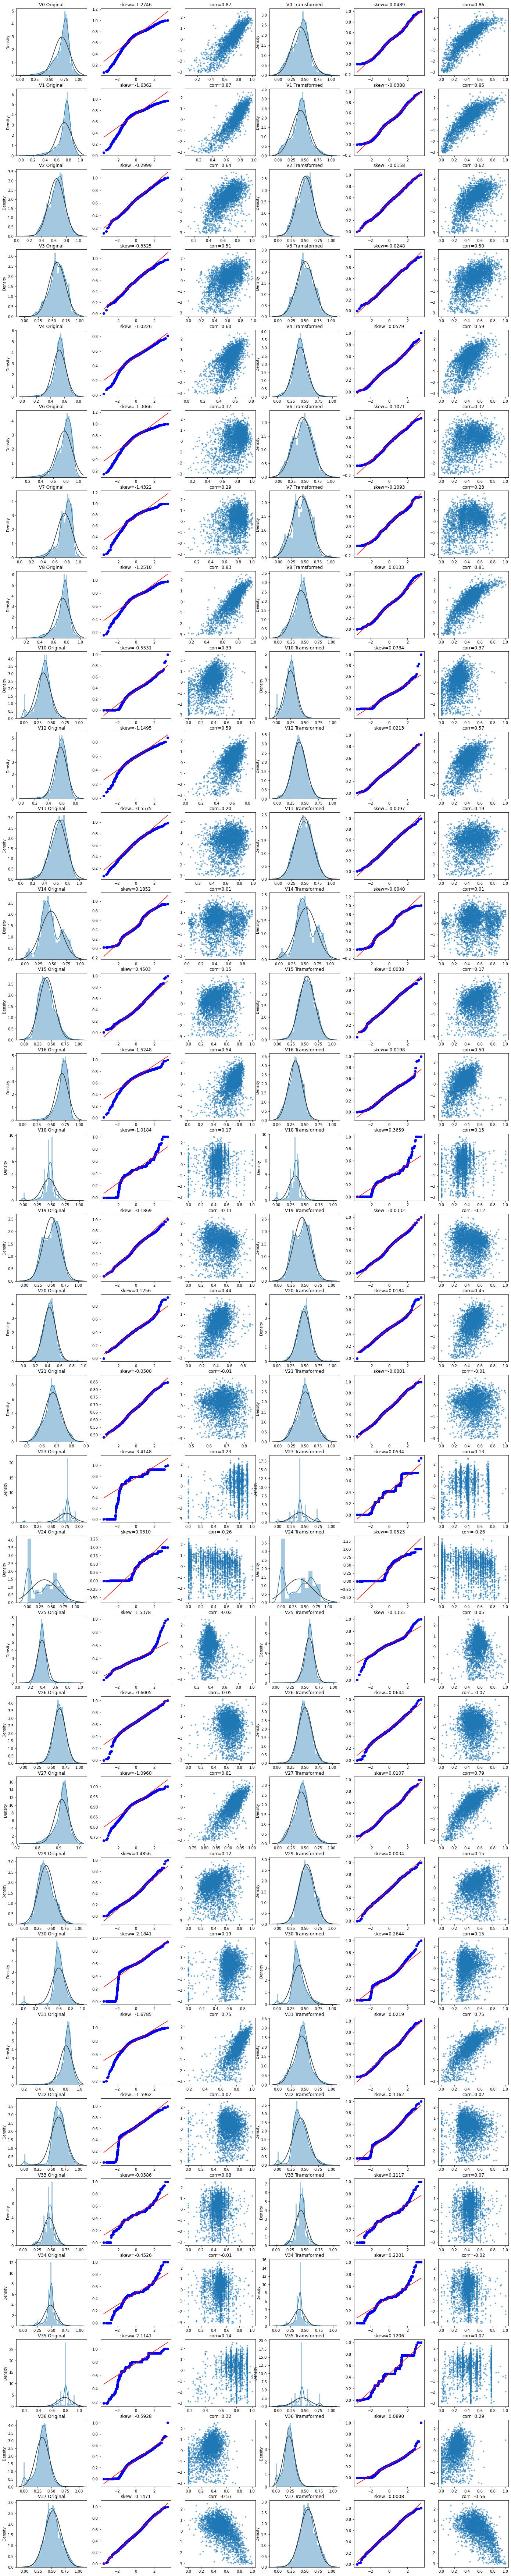

In [150]:
#Check effect of Box-Cox transforms on distributions of continuous variables

fcols = 6
frows = len(cols_numeric)-1
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric:
    if var!='target':
        dat = data_all[[var, 'target']].dropna()
        
        i+=1
        plt.subplot(frows,fcols,i)
        sns.distplot(dat[var] , fit=stats.norm);
        plt.title(var+' Original')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(dat[var], plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
        plt.xlabel('')
        plt.ylabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(dat[var], dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
        i+=1
        plt.subplot(frows,fcols,i)
        trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
        trans_var = scale_minmax(trans_var)      
        sns.distplot(trans_var , fit=stats.norm);
        plt.title(var+' Tramsformed')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(trans_var, plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
        plt.xlabel('')
        plt.ylabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(trans_var, dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

In [151]:
cols_transform=data_all.columns[0:-2]
for col in cols_transform:   
    # transform column
    data_all.loc[:,col], _ = stats.boxcox(data_all.loc[:,col]+1)

count    2888.000000
mean        0.126353
std         0.983966
min        -3.044000
25%        -0.350250
50%         0.313000
75%         0.793250
max         2.538000
Name: target, dtype: float64


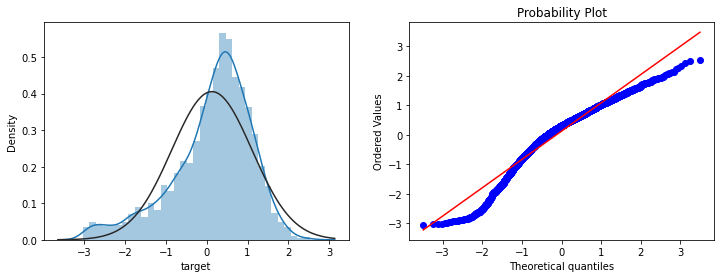

In [152]:
print(data_all.target.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data_all.target.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(data_all.target.dropna(), plot=plt)

count    2888.000000
mean        1.129957
std         0.394110
min         0.291057
25%         0.867609
50%         1.135315
75%         1.379382
max         2.798463
Name: target, dtype: float64


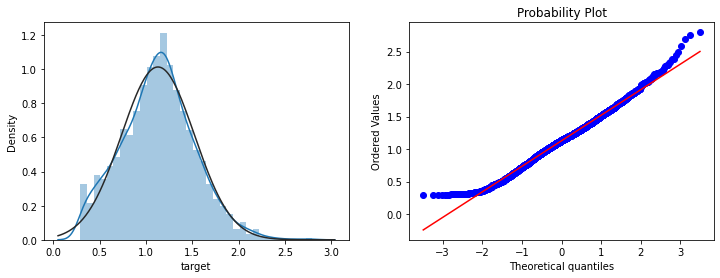

In [153]:
#Log Transform SalePrice to improve normality
sp = data_train.target
data_train.target1 =np.power(1.5,sp)
print(data_train.target1.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data_train.target1.dropna(),fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(data_train.target1.dropna(), plot=plt)

In [154]:
# function to get training samples
def get_training_data():
    # extract training samples
    from sklearn.model_selection import train_test_split
    df_train = data_all[data_all["oringin"]=="train"]
    df_train["label"]=data_train.target1
    # split SalePrice and features
    y = df_train.target
    X = df_train.drop(["oringin","target","label"],axis=1)
    X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=100)
    return X_train,X_valid,y_train,y_valid

# extract test data (without SalePrice)
def get_test_data():
    df_test = data_all[data_all["oringin"]=="test"].reset_index(drop=True)
    return df_test.drop(["oringin","target"],axis=1)

In [156]:
from sklearn.metrics import make_scorer
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)
def mse(y_ture,y_pred):
    return mean_squared_error(y_ture,y_pred)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)
mse_scorer = make_scorer(mse, greater_is_better=False)

In [157]:
# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

R2= 0.8794138470953502
rmse= 0.3451033881505014
mse= 0.11909634851295581
---------------------------------------
mean of residuals: -4.678208450127577e-16
std of residuals: 0.3451887992118637
---------------------------------------
23 outliers:
[2655, 2159, 1164, 2863, 1145, 2697, 2528, 2645, 691, 1085, 1874, 2647, 776, 2625, 884, 2696, 2668, 1310, 1901, 2769, 2002, 2669, 1040]


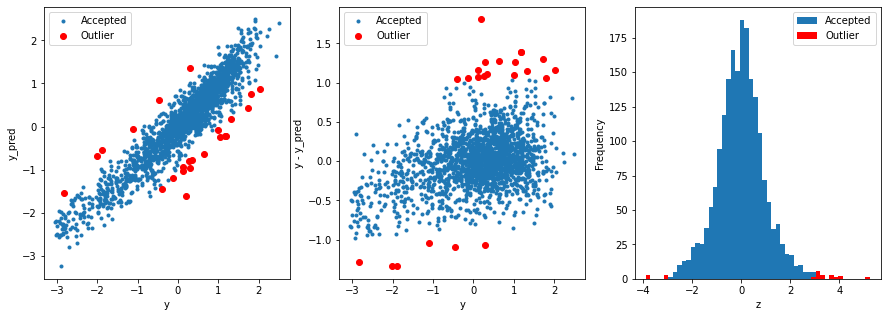

In [158]:
# get training data
from sklearn.linear_model import Ridge
X_train, X_valid,y_train,y_valid = get_training_data()
test=get_test_data()

# find and remove outliers using a Ridge model
outliers = find_outliers(Ridge(), X_train, y_train)

# permanently remove these outliers from the data
#df_train = data_all[data_all["oringin"]=="train"]
#df_train["label"]=data_train.target1
#df_train=df_train.drop(outliers)
X_outliers=X_train.loc[outliers]
y_outliers=y_train.loc[outliers]
X_t=X_train.drop(outliers)
y_t=y_train.drop(outliers)

In [159]:
def get_trainning_data_omitoutliers():
    y1=y_t.copy()
    X1=X_t.copy()
    return X1,y1

In [160]:

from sklearn.preprocessing import StandardScaler
def train_model(model, param_grid=[], X=[], y=[], 
                splits=5, repeats=5):

    # get unmodified training data, unless data to use already specified
    if len(y)==0:
        X,y = get_trainning_data_omitoutliers()
        #poly_trans=PolynomialFeatures(degree=2)
        #X=poly_trans.fit_transform(X)
        #X=MinMaxScaler().fit_transform(X)
    
    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)
    
    # perform a grid search if param_grid given
    if len(param_grid)>0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring="neg_mean_squared_error",
                               verbose=1, return_train_score=True)

        # search the grid
        gsearch.fit(X,y)

        # extract best model from the grid
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_

        # get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    print('score=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print('mse=',mse(y, y_pred))
    print('cross_val: mean=',cv_mean,', std=',cv_std)
    
    # residual plots
    y_pred = pd.Series(y_pred,index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid)/std_resid    
    n_outliers = sum(abs(z)>3)
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y,y_pred)[0][1]))
    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    
    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))

    return model, cv_score, grid_results

In [161]:
# places to store optimal models and scores
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

# no. k-fold splits
splits=5
# no. k-fold iterations
repeats=5

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------------------
Ridge(alpha=0.25)
----------------------
score= 0.8963563382458094
rmse= 0.3189964919993529
mse= 0.10175876190789339
cross_val: mean= 0.10613030723110956 , std= 0.007753452140838006


[Parallel(n_jobs=1)]: Done 575 out of 575 | elapsed:    2.6s finished


Text(0, 0.5, 'score')

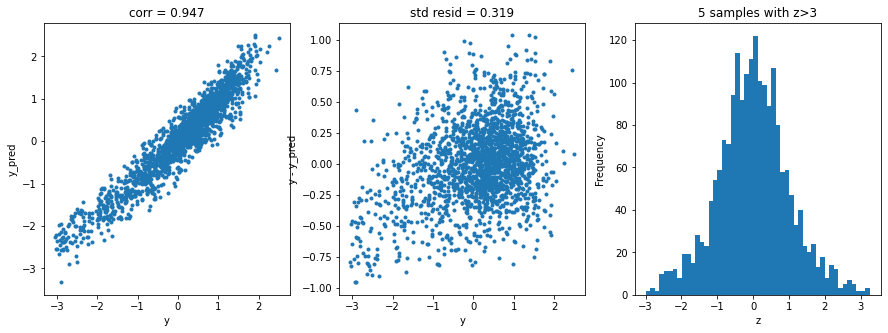

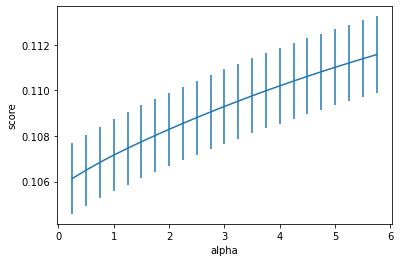

In [162]:
model = 'Ridge'

opt_models[model] = Ridge()
alph_range = np.arange(0.25,6,0.25)
param_grid = {'alpha': alph_range}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------------------
Lasso(alpha=0.0001)
----------------------
score= 0.8965376024713236
rmse= 0.31871742063608494
mse= 0.10158079421691905
cross_val: mean= 0.10640364833239253 , std= 0.008750653673414184


[Parallel(n_jobs=1)]: Done 575 out of 575 | elapsed:    5.8s finished


Text(0, 0.5, 'score')

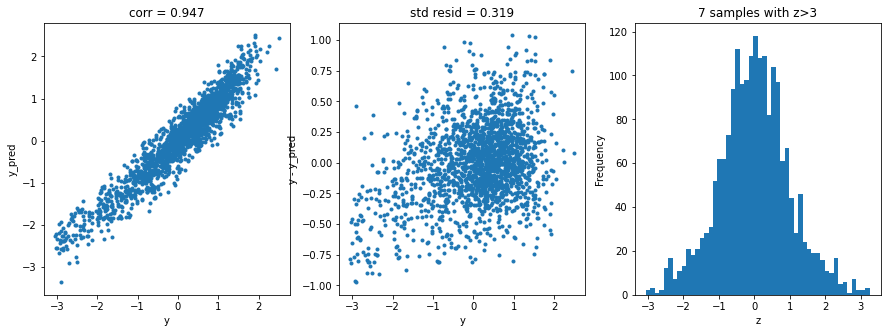

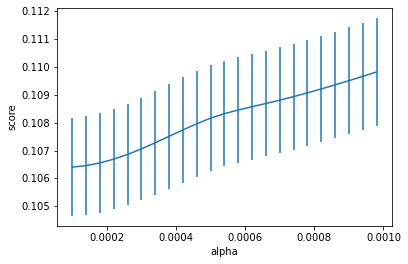

In [163]:
model = 'Lasso'

opt_models[model] = Lasso()
alph_range = np.arange(1e-4,1e-3,4e-5)
param_grid = {'alpha': alph_range}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    4.3s finished


----------------------
ElasticNet(alpha=0.0001, l1_ratio=0.9, max_iter=100000)
----------------------
score= 0.8965268228807055
rmse= 0.31873402354649244
mse= 0.10159137776613575
cross_val: mean= 0.10684058051696954 , std= 0.006580638941351018


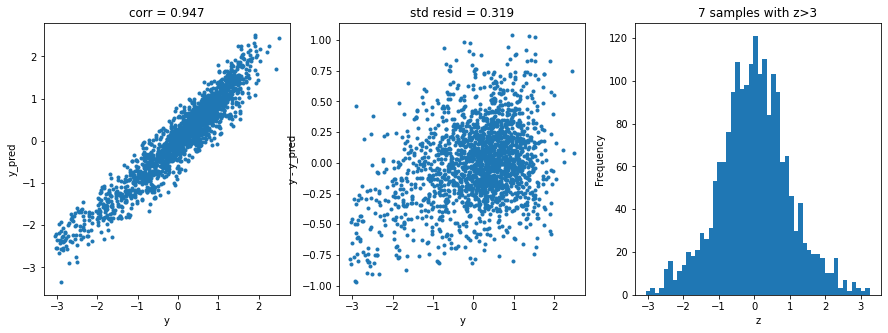

In [164]:
model ='ElasticNet'
opt_models[model] = ElasticNet()

param_grid = {'alpha': np.arange(1e-4,1e-3,1e-4),
              'l1_ratio': np.arange(0.1,1.0,0.1),
              'max_iter':[100000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 25 folds for each of 9 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   26.8s finished


----------------------
LinearSVR(C=0.1)
----------------------
score= 0.15301248775044773
rmse= 0.9119122224260026
mse= 0.8315839014099313
cross_val: mean= 0.999897425440339 , std= 0.5287822609128597


Text(0, 0.5, 'score')

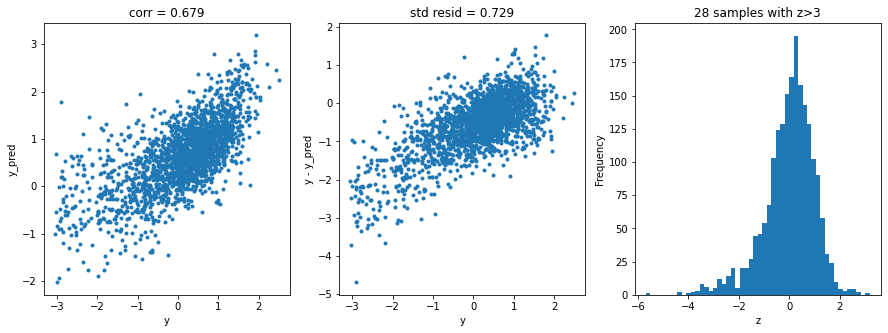

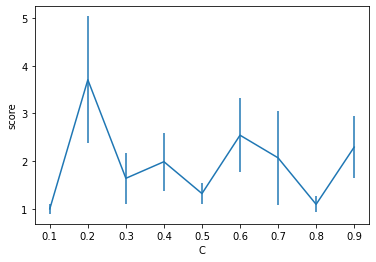

In [165]:
model='LinearSVR'
opt_models[model] = LinearSVR()

crange = np.arange(0.1,1.0,0.1)
param_grid = {'C':crange,
             'max_iter':[1000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=repeats)


cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(crange, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('C')
plt.ylabel('score')


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------------------
KNeighborsRegressor(n_neighbors=10)
----------------------
score= 0.7188007679386812
rmse= 0.5254381453364181
mse= 0.27608524457457456
cross_val: mean= 0.3394868014050501 , std= 0.023068087219439596


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished


Text(0, 0.5, 'score')

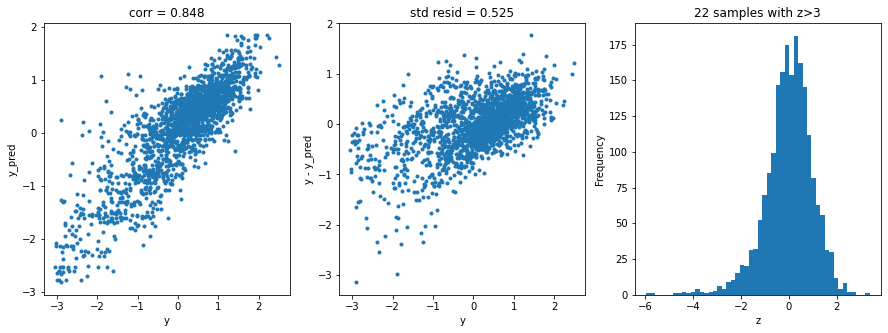

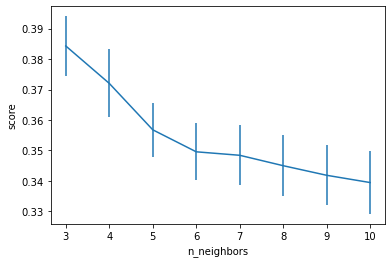

In [166]:
model = 'KNeighbors'
opt_models[model] = KNeighborsRegressor()

param_grid = {'n_neighbors':np.arange(3,11,1)}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(np.arange(3,11,1), abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*1))
plt.xlabel('n_neighbors')
plt.ylabel('score')

In [ ]:
model = 'GradientBoosting'
opt_models[model] = GradientBoostingRegressor()

param_grid = {'n_estimators':[150,250,350],
              'max_depth':[1,2,3],
              'min_samples_split':[5,6,7]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
model = 'XGB'
opt_models[model] = XGBRegressor()

param_grid = {'n_estimators':[100,200,300,400,500],
              'max_depth':[1,2,3],
             }

opt_models[model], cv_score,grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

In [ ]:
model = 'RandomForest'
opt_models[model] = RandomForestRegressor()

param_grid = {'n_estimators':[100,150,200],
              'max_features':[8,12,16,20,24],
              'min_samples_split':[2,4,6]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=5, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

In [ ]:
def model_predict(test_data,test_y=[],stack=False):
    #poly_trans=PolynomialFeatures(degree=2)
    #test_data1=poly_trans.fit_transform(test_data)
    #test_data=MinMaxScaler().fit_transform(test_data)
    i=0
    y_predict_total=np.zeros((test_data.shape[0],))
    for model in opt_models.keys():
        if model!="LinearSVR" and model!="KNeighbors":
            y_predict=opt_models[model].predict(test_data)
            y_predict_total+=y_predict
            i+=1
        if len(test_y)>0:
            print("{}_mse:".format(model),mean_squared_error(y_predict,test_y))
    y_predict_mean=np.round(y_predict_total/i,3)
    if len(test_y)>0:
        print("mean_mse:",mean_squared_error(y_predict_mean,test_y))
    else:
        y_predict_mean=pd.Series(y_predict_mean)
        return y_predict_mean

In [ ]:
model_predict(X_valid,y_valid)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

##主要使用pip install mlxtend安装mlxtend
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()